In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
import os
import glob
import matplotlib.image as mpimg
from pathlib import Path
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [64]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define directories
original_data_dir = 'compdata3/Datasets/old_turkic'  # Path to your original data directory
base_dir = 'data_split_old_turkic3'  # Base directory to save the split data

# Create base directory if it does not exist
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Split dataset into training-validation and testing
trainval_dir = os.path.join(base_dir, 'trainval')
test_dir = os.path.join(base_dir, 'test')
os.mkdir(trainval_dir)
os.mkdir(test_dir)

# Move data to trainval and test directories
for class_name in os.listdir(original_data_dir):
    class_dir = os.path.join(original_data_dir, class_name)
    trainval_class_dir = os.path.join(trainval_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.mkdir(trainval_class_dir)
    os.mkdir(test_class_dir)
    filenames = os.listdir(class_dir)
    trainval_filenames, test_filenames = train_test_split(filenames, test_size=0.2, random_state=42)
    for filename in trainval_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(trainval_class_dir, filename)
        shutil.copyfile(src, dst)
    for filename in test_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(test_class_dir, filename)
        shutil.copyfile(src, dst)

# Split training-validation set into training and validation
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
os.mkdir(train_dir)
os.mkdir(val_dir)

for class_name in os.listdir(trainval_dir):
    class_dir = os.path.join(trainval_dir, class_name)
    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    os.mkdir(train_class_dir)
    os.mkdir(val_class_dir)
    filenames = os.listdir(class_dir)
    train_filenames, val_filenames = train_test_split(filenames, test_size=0.25, random_state=42)  # 60% train, 20% validation
    for filename in train_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(train_class_dir, filename)
        shutil.copyfile(src, dst)
    for filename in val_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(val_class_dir, filename)
        shutil.copyfile(src, dst)


In [69]:
BATCH_SIZE = 16
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # 30% of the data will be used for validation
)

# Load and split data from the same directory
train_generator = datagen.flow_from_directory(
    'data_split_old_turkic3/train',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify 'training' subset for training data
)

validation_generator = datagen.flow_from_directory(
    'data_split_old_turkic3/val',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' )
test_generator = datagen.flow_from_directory(
    'data_split_old_turkic3/test',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' subset for testing data
)

Found 323 images belonging to 17 classes.
Found 34 images belonging to 17 classes.
Found 34 images belonging to 18 classes.


In [66]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(64,64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(17, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.2142 - loss: 3.6198 - val_accuracy: 0.6562 - val_loss: 1.2058
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5625 - loss: 1.4653 - val_accuracy: 0.5000 - val_loss: 1.1166
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.7665 - loss: 0.8395 - val_accuracy: 1.0000 - val_loss: 0.1402
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.2836 - val_accuracy: 1.0000 - val_loss: 0.1566
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.9502 - loss: 0.1680 - val_accuracy: 0.9688 - val_loss: 0.0828
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0526 - val_accuracy: 1.0000 - val_loss: 0.0449
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9881 - loss: 0.1038 - val_accuracy: 1.0000 - val_loss: 0.0104
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0183 - val_accuracy: 1.0000 - v

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


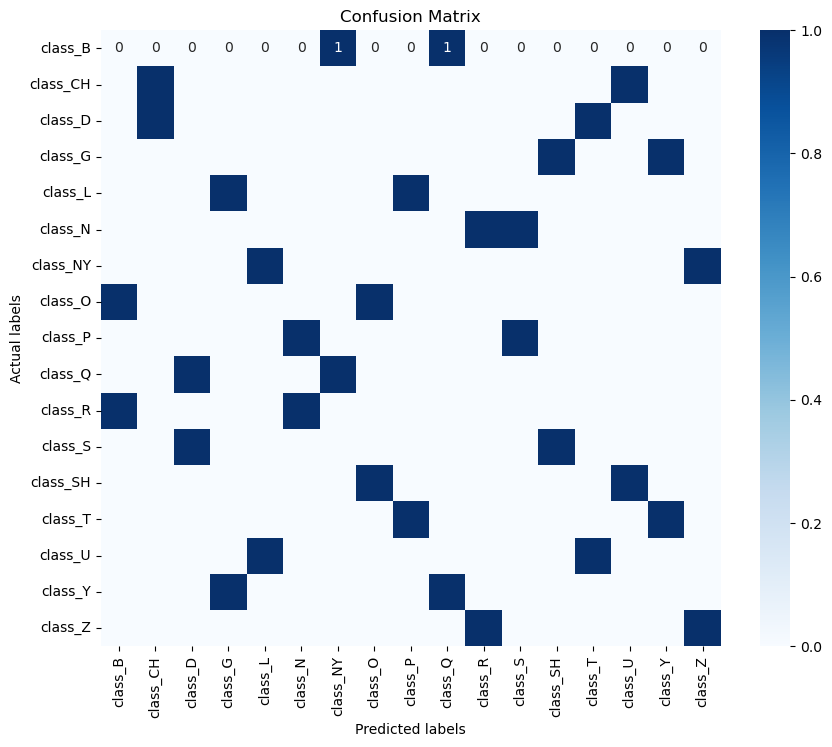

In [67]:
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [70]:

# Load the saved model
loaded_model = tf.keras.models.load_model('hung.h5')

# Evaluate the model on another dataset
evaluation_result = loaded_model.evaluate(test_generator)

# Print evaluation result
print("Evaluation Result:")
print("Loss:", evaluation_result[0])
print("Accuracy:", evaluation_result[1])


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1213 - loss: 7.9250 
Evaluation Result:
Loss: 8.04805850982666
Accuracy: 0.11764705926179886


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


In [71]:
# Load the saved model
loaded_model = tf.keras.models.load_model('hung_large.h5')

# Evaluate the model on another dataset
evaluation_result = loaded_model.evaluate(test_generator)

# Print evaluation result
print("Evaluation Result:")
print("Loss:", evaluation_result[0])
print("Accuracy:", evaluation_result[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_crossentropy: 440.3127 - loss: 1.9222 
Evaluation Result:
Loss: 1.9392201900482178
Accuracy: 471.04156494140625


In [72]:
# Load the saved model
loaded_model = tf.keras.models.load_model('hung_large1.h5')

# Evaluate the model on another dataset
evaluation_result = loaded_model.evaluate(test_generator)

# Print evaluation result
print("Evaluation Result:")
print("Loss:", evaluation_result[0])
print("Accuracy:", evaluation_result[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1369 - loss: 12.2048 
Evaluation Result:
Loss: 12.206172943115234
Accuracy: 0.11764705926179886


In [73]:
# Load the saved model
loaded_model = tf.keras.models.load_model('minst.h5')

# Evaluate the model on another dataset
evaluation_result = loaded_model.evaluate(test_generator)

# Print evaluation result
print("Evaluation Result:")
print("Loss:", evaluation_result[0])
print("Accuracy:", evaluation_result[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0607 - loss: 2.9116  
Evaluation Result:
Loss: 2.906477689743042
Accuracy: 0.05882352963089943


In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64,64, 3),),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu',),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu',),
    Dense(256, activation='relu'),
    Dense(19, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_hinge', metrics=[ 'categorical_crossentropy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=200,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

In [ ]:
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()